In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


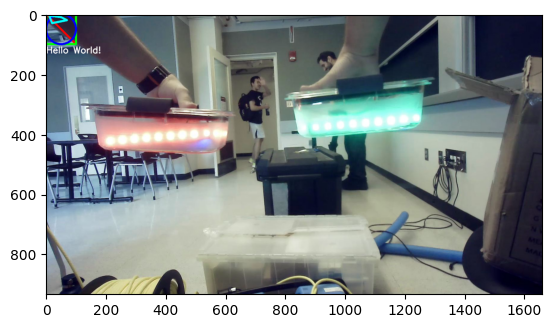

In [2]:

img = cv2.imread('image.jpeg')
cv2.line(img, (0, 0), (100, 100), (255, 0, 0), 5)
cv2.rectangle(img, (0, 0), (100, 100), (0, 255, 0), 5)
cv2.circle(img, (50, 50), 50, (0, 0, 255), 5)
pts = np.array([[10, 5], [20, 30], [70, 20], [50, 10]], np.int32)
pts = pts.reshape((-1, 1, 2))
cv2.polylines(img, [pts], True, (0, 255, 255), 5)
cv2.putText(img, 'Hello World!', (0, 130), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
plt.imshow(img)



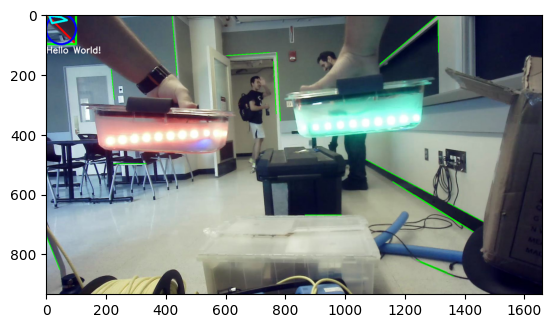

In [3]:

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
edges = cv2.Canny(gray, 500, 150, apertureSize=3) # detect edges
lines = cv2.HoughLinesP(
                edges,
                1,
                np.pi/180,
                100,
                minLineLength=100,
                maxLineGap=10,
        ) # detect lines

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(img)



In [4]:
from dt_apriltags import Detector

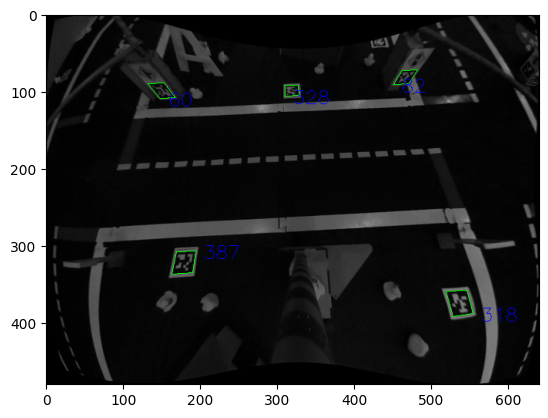

In [5]:
img = cv2.imread('test_image.png', cv2.IMREAD_GRAYSCALE)
at_detector = Detector(families='tag36h11',
                       nthreads=1,
                       quad_decimate=1.0,
                       quad_sigma=0.0,
                       refine_edges=1,
                       decode_sharpening=0.25,
                       debug=0)

tags = at_detector.detect(img, estimate_tag_pose=False, camera_params=None, tag_size=None)
color_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
for tag in tags:
    for idx in range(len(tag.corners)):
        cv2.line(color_img, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0))

    cv2.putText(color_img, str(tag.tag_id),
                org=(tag.corners[0, 0].astype(int) + 10, tag.corners[0, 1].astype(int) + 10),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=0.8,
                color=(0, 0, 255))
    plt.imshow(color_img)

In [6]:
slopes = (lines[:, :, 3] - lines[:, :, 1]) / (lines[:, :, 1] - lines[:, :, 0])
print(len(slopes))

17


In [7]:
def get_slopes(frame):
    # img = cv2.imread('rov_pool.jpg')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
    edges = cv2.Canny(gray, 600, 1200, apertureSize=5) # detect edges
    lines = cv2.HoughLinesP(
                    edges,
                    1,
                    np.pi/180,
                    100,
                    minLineLength=500,
                    maxLineGap=30,
            ) # detect lines
    
    if lines is not None:
            for line in lines:
                x1, y1, x2, y2 = line[0]
                cv2.line(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.line(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(frame, f"({x1}, {y1})", (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
                cv2.putText(frame, f"({x2}, {y2})", (x2, y2), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            return (lines[:, :, 3] - lines[:, :, 1]) / (lines[:, :, 1] - lines[:, :, 0])
    return None

cap = cv2.VideoCapture("AUV_vid.mkv")
success = cap.grab()
new_frames = []
slopes = []
i = 0
while success:
    i += 1
    if i % 50 == 0:
        _, frame = cap.retrieve()
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        slope = get_slopes(frame)
        if slopes is not None:
            new_frames.append(frame)
            slopes.append(slope)
    success = cap.grab()

[ERROR:0@8.272] global cap.cpp:164 open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.8.0) /io/opencv/modules/videoio/src/cap_images.cpp:253: error: (-5:Bad argument) CAP_IMAGES: can't find starting number (in the name of file): AUV_vid.mkv in function 'icvExtractPattern'




In [ ]:
height, width, layers = new_frames[0].shape
video = cv2.VideoWriter('ouput.avi', cv2.VideoWriter_fourcc(*'DIVX'), 15, (width,height))
for frame in new_frames:
    video.write(frame)
video.release()